In [2]:
import pandas as pd

# Path to your dataset
path = r"C:\Users\sagni\Downloads\Fake News Predictor\archive (1)\fake.csv"

# Load dataset
df = pd.read_csv(path)
df.head()


,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
path = r"C:\Users\sagni\Downloads\Fake News Predictor\archive (1)\fake.csv"
df = pd.read_csv(path)

# Check columns
print(df.columns)

# Encode labels from 'type' column
le = LabelEncoder()
df['label'] = le.fit_transform(df['type'])  # Convert 'bias', 'satire', etc. to 0,1,2...

# Select text and label columns
texts = df['text']
labels = df['label']

# Train-test split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)


Index(['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text',
       'language', 'crawled', 'site_url', 'country', 'domain_rank',
       'thread_title', 'spam_score', 'main_img_url', 'replies_count',
       'participants_count', 'likes', 'comments', 'shares', 'type'],
      dtype='object')


In [5]:
print(df['type'].unique())
print(le.classes_)


['bias' 'conspiracy' 'fake' 'bs' 'satire' 'hate' 'junksci' 'state']
['bias' 'bs' 'conspiracy' 'fake' 'hate' 'junksci' 'satire' 'state']


                                       uuid  ord_in_thread  \
0  6a175f46bcd24d39b3e962ad0f29936721db70db              0   
1  2bdc29d12605ef9cf3f09f9875040a7113be5d5b              0   
2  c70e149fdd53de5e61c29281100b9de0ed268bc3              0   
3  7cf7c15731ac2a116dd7f629bd57ea468ed70284              0   
4  0206b54719c7e241ffe0ad4315b808290dbe6c0f              0   

                 author                      published  \
0     Barracuda Brigade  2016-10-26T21:41:00.000+03:00   
1  reasoning with facts  2016-10-29T08:47:11.259+03:00   
2     Barracuda Brigade  2016-10-31T01:41:49.479+02:00   
3                Fed Up  2016-11-01T05:22:00.000+02:00   
4                Fed Up  2016-11-01T21:56:00.000+02:00   

                                               title  \
0  Muslims BUSTED: They Stole Millions In Gov’t B...   
1  Re: Why Did Attorney General Loretta Lynch Ple...   
2  BREAKING: Weiner Cooperating With FBI On Hilla...   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...  

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🌟 Epoch 1/3


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 324/324 [06:44<00:00,  1.25s/it]


Train Loss: 0.5553, Val Loss: 0.5373, Val Accuracy: 0.8873

🌟 Epoch 2/3


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 324/324 [06:59<00:00,  1.30s/it]


Train Loss: 0.5389, Val Loss: 0.5351, Val Accuracy: 0.8873

🌟 Epoch 3/3


Evaluating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 324/324 [06:31<00:00,  1.21s/it]


Train Loss: 0.5203, Val Loss: 0.5035, Val Accuracy: 0.8877


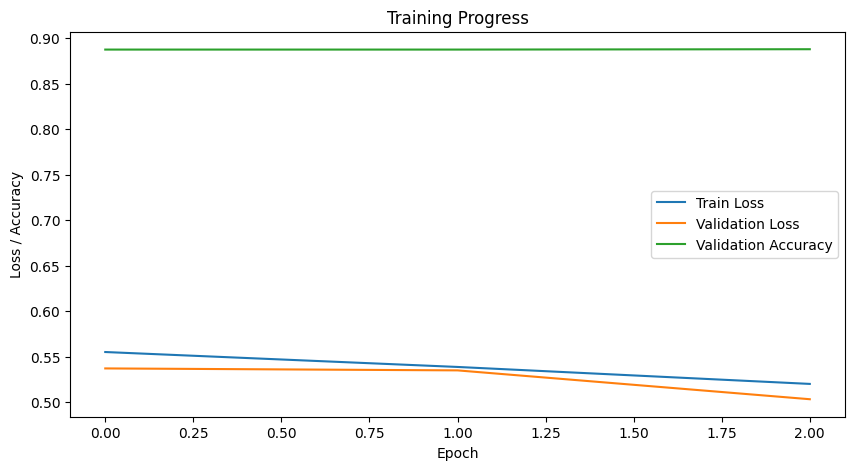

📰 Prediction: bs


In [8]:
# 📦 Install dependencies (run only once)
!pip install transformers datasets torch scikit-learn matplotlib

# 📂 Import libraries
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup
from tqdm import tqdm
import matplotlib.pyplot as plt

# 📥 Load dataset
file_path = r"C:\Users\sagni\Downloads\Fake News Predictor\archive (1)\fake.csv"
df = pd.read_csv(file_path)

# 📊 Check dataset
print(df.head())
print(df['type'].value_counts())

# ✅ Keep only necessary columns
df = df[['text', 'type']]
df.dropna(inplace=True)

# 🎯 Encode labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['type'])

# 🔥 Split dataset
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# 🧹 Clean text
train_texts = train_texts.fillna('').astype(str)
val_texts = val_texts.fillna('').astype(str)

# 🤖 Tokenizer & Model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=len(le.classes_),
)

# 🔗 Tokenize texts
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=512)

# 📦 Create PyTorch Dataset
class NewsDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = NewsDataset(train_encodings, list(train_labels))
val_dataset = NewsDataset(val_encodings, list(val_labels))

# 🚀 DataLoader
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

# ⚡ Training setup
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
optimizer = AdamW(model.parameters(), lr=5e-5)
epochs = 3
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=len(train_loader) * epochs
)

# 📈 Training loop
def train():
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc='Training'):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        scheduler.step()
    return total_loss / len(train_loader)

def evaluate():
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in tqdm(val_loader, desc='Evaluating'):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits
            total_loss += loss.item()
            preds = torch.argmax(logits, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    accuracy = correct / total
    return total_loss / len(val_loader), accuracy

train_losses, val_losses, val_accuracies = [], [], []
for epoch in range(epochs):
    print(f'\n🌟 Epoch {epoch+1}/{epochs}')
    train_loss = train()
    val_loss, val_acc = evaluate()
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    print(f'Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}')

# 📊 Plot results
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.title('Training Progress')
plt.legend()
plt.show()

# ✅ Save model
model.save_pretrained("fake_news_bert")
tokenizer.save_pretrained("fake_news_bert")

# 🔥 Predict on new data
def predict(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_class_id = logits.argmax().item()
    return le.inverse_transform([predicted_class_id])[0]

# Example prediction
sample_text = "BREAKING: New evidence shows election fraud"
print(f'📰 Prediction: {predict(sample_text)}')